# Paiy trading Cripto

In [47]:
import numpy as np
import pandas as pd 
import yfinance as y 
import seaborn as sea
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
cryptos = [
    "BTC-USD", "ETH-USD", "USDT-USD", "XRP-USD", "BNB-USD",
    "SOL-USD", "USDC-USD", "DOGE-USD", "STETH-USD", "TRX-USD",
    "WTRX-USD", "ADA-USD", "WSTETH-USD", "USDE29470-USD", "WBTC-USD",
    "HYPE32196-USD", "WBETH-USD", "LINK-USD", "WETH-USD", "AVAX-USD",
    "XLM-USD", "SUI20947-USD", "BCH-USD", "WEETH-USD", "AETHWETH-USD",
    "LEO-USD", "HBAR-USD", "USDS33039-USD", "LTC-USD", "BTCB-USD",
    "SHIB-USD", "TON11419-USD", "AETHUSDT-USD", "CRO-USD", "CBBTC32994-USD",
    "DOT-USD", "SUSDE-USD", "MNT27075-USD", "DAI-USD", "XMR-USD",
    "WLFI33251-USD", "UNI7083-USD", "AAVE-USD", "OKB-USD", "ENA-USD",
    "PEPE24478-USD", "BGB-USD", "NEAR-USD", "ASTER36341-USD", "TAO22974-USD"
]

In [15]:
import os 
def download_data(cryptos, retrie=False):
    if not os.path.exists(f"data/*.csv") or retrie:
        os.makedirs("data", exist_ok=True) 
        for crypto in cryptos:
            df = y.download(crypto, period="2y", interval="1d", auto_adjust=True)["Close"]
            df.to_csv(f"data/{crypto}.csv")
        return True

In [16]:
data = download_data(cryptos, retrie=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [29]:
crypto_list = []
for crypto in cryptos:
    data = pd.read_csv(f"data/{crypto}.csv")
    data = data.set_index("Date")
    data.index = pd.to_datetime(data.index)
    if data.shape[0] >= 732:
        crypto_list.append(data)
data = pd.concat(crypto_list, axis=1)

In [31]:
data.head()

,BTC-USD,ETH-USD,USDT-USD,XRP-USD,BNB-USD,SOL-USD,USDC-USD,DOGE-USD,STETH-USD,TRX-USD,...,MNT27075-USD,DAI-USD,XMR-USD,UNI7083-USD,AAVE-USD,OKB-USD,PEPE24478-USD,BGB-USD,NEAR-USD,TAO22974-USD
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-26,26217.250000,1593.417236,0.999606,0.501708,212.378448,19.023287,1.000079,0.060599,1591.249390,0.084648,...,0.390065,1.000142,144.818741,4.254614,61.084534,43.134773,1.000000e-06,0.447343,1.079827,58.674946
2023-09-27,26352.716797,1597.491211,0.999386,0.499597,211.985413,19.130022,1.000156,0.060504,1597.856079,0.085415,...,0.388638,0.999955,146.434097,4.247225,60.622601,42.685795,1.000000e-06,0.450069,1.075759,56.093914
2023-09-28,27021.546875,1652.882690,1.000017,0.509525,215.075989,19.957617,1.000064,0.061484,1647.446777,0.086724,...,0.394717,1.000288,146.061279,4.416313,65.740623,43.309925,1.000000e-06,0.453935,1.107285,56.753483
2023-09-29,26911.720703,1667.943848,1.000042,0.521719,215.279419,20.300655,1.000095,0.062178,1666.048584,0.089140,...,0.397437,1.000307,146.837479,4.401975,66.104950,43.115204,1.000000e-06,0.453784,1.122494,55.613262
2023-09-30,26967.916016,1671.161865,1.000210,0.515405,214.821304,21.395147,1.000106,0.062141,1674.551758,0.088684,...,0.398051,0.999674,146.554260,4.459536,67.553017,42.753895,1.000000e-06,0.451796,1.133987,55.045544


In [37]:
subset = data.pct_change().mean() * 252
subset = subset.reset_index(name='return')

In [39]:
subset['volatility'] = (data.pct_change().std() * np.sqrt(252)).values

In [41]:
subset = subset.set_index("index")

In [50]:
fig = px.scatter(
    x = subset['return'],
    y = subset['volatility'],
    labels = {
        "x": "return",
        "y": "volatility"
    },
    color = subset.index
)
fig.show()

Criando clusters

In [52]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.metrics import silhouette_score

Metodo do silhete

In [65]:
max_clusters = 30
silhuete = []


for i in range(2, max_clusters):
    model = KMeans(n_clusters=i)
    model.fit(subset)
    silhuete.append(silhouette_score(subset, model.labels_))

[]

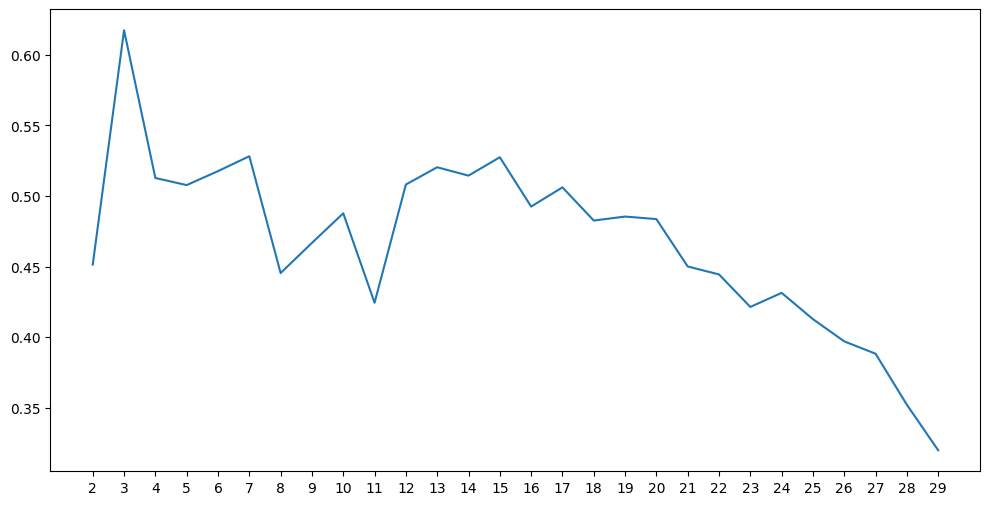

In [66]:
plt.figure(figsize=(12,6))
plt.plot(range(2, max_clusters), silhuete)
plt.xticks(range(2, max_clusters))
plt.plot()

In [67]:
cluster_mean = KMeans(n_clusters=3)
cluster_mean.fit(subset)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [68]:
pred = cluster_mean.predict(subset)

In [69]:
pred = pd.Series(pred, index=subset.index)

In [71]:
pred.value_counts()

2    21
0    17
1     1
Name: count, dtype: int64

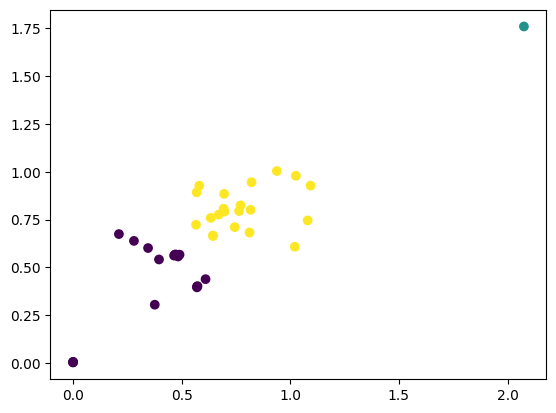

In [72]:
plt.scatter(subset['return'], subset['volatility'], c=pred)
plt.show()  

Afinity

In [74]:
ap = AffinityPropagation()
ap.fit(subset)

,damping,0.5
,max_iter,200
,convergence_iter,15
,copy,True
,preference,None
,affinity,'euclidean'
,verbose,False
,random_state,None


In [75]:
pred = ap.predict(subset)

In [76]:
pred = pd.Series(pred, index=subset.index)
pred.value_counts()

1    16
4     9
0     5
2     5
3     3
5     1
Name: count, dtype: int64

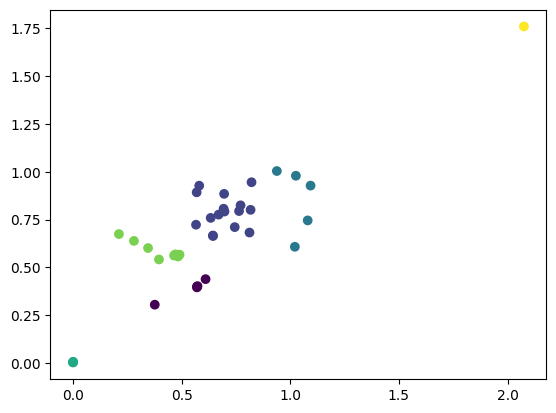

In [77]:
plt.scatter(subset['return'], subset['volatility'], c=pred)
plt.show()

In [80]:
hp = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [81]:
pred = hp.fit_predict(subset)
pred = pd.Series(pred, index=subset.index)
pred.value_counts()

1    21
0    17
2     1
Name: count, dtype: int64

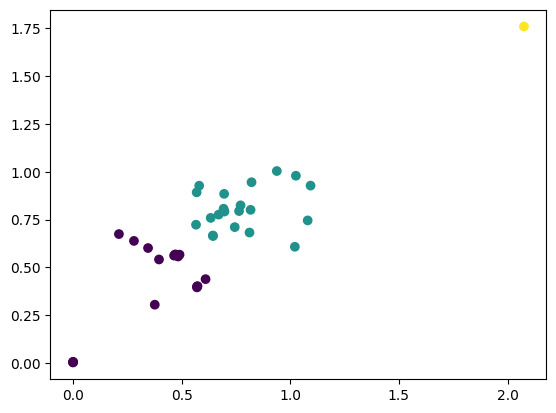

In [82]:
plt.scatter(subset['return'], subset['volatility'], c=pred)
plt.show()

In [83]:
print(f'silhouette_score cluster_mean: {silhouette_score(subset, cluster_mean.labels_)}')
print(f'silhouette_score affinity: {silhouette_score(subset, ap.labels_)}')
print(f'silhouette_score hierarchical: {silhouette_score(subset, hp.labels_)}')

silhouette_score cluster_mean: 0.4782823323580935
silhouette_score affinity: 0.5240453533799024
silhouette_score hierarchical: 0.4782823323580935


Melhor modelo Affinity

In [84]:
def find_cointegrated_pairs(data, significance=0.05):
    from statsmodels.tsa.stattools import coint
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.columns
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]] #
            S2 = data[keys[j]] # 

            # Verifica se as séries são cointegradas
            result = coint(S1, S2)
            pvalue = result[1]
            pvalue_matrix[i, j] = pvalue
            score_matrix[i, j] = result[0]

            # Adiciona o par se o p-valor for menor que o nível de significância
            if pvalue < significance:
                pairs.append((keys[i], keys[j])) # As series são cointegradas
    return pairs, pvalue_matrix, score_matrix

In [86]:
pred = ap.predict(subset)

In [87]:
pred = pd.Series(pred, index=subset.index)

In [91]:
pred_list = pred.unique().tolist()
pred_list

[0, 4, 3, 1, 2, 5]

In [92]:
clustered_list = pred_list

In [93]:
cluster_dict = {}

for i, clust in enumerate(sorted(clustered_list)):
    tickets = list(pred[pred == clust].index)
    subset_i = data[tickets].dropna()
    pairs, pvalue_matrix,  score_matrix = find_cointegrated_pairs(subset_i)
    cluster_dict[clust] = {}
    cluster_dict[clust]['pairs'] = pairs
    cluster_dict[clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[clust]['score_matrix'] = score_matrix


pairs = []

for clust in cluster_dict.keys():
    pairs += cluster_dict[clust]['pairs']

In [94]:
stocks = np.unique(pairs)
in_pairs_series = pred.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = subset.loc[stocks]

In [95]:
from sklearn.manifold import TSNE

tsne_model = TSNE(learning_rate=50, perplexity=3, random_state=1337)
X_tsne = tsne_model.fit_transform(X_pairs)

C:\Users\mateu\AppData\Local\Temp\ipykernel_11272\3066737225.py:25: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



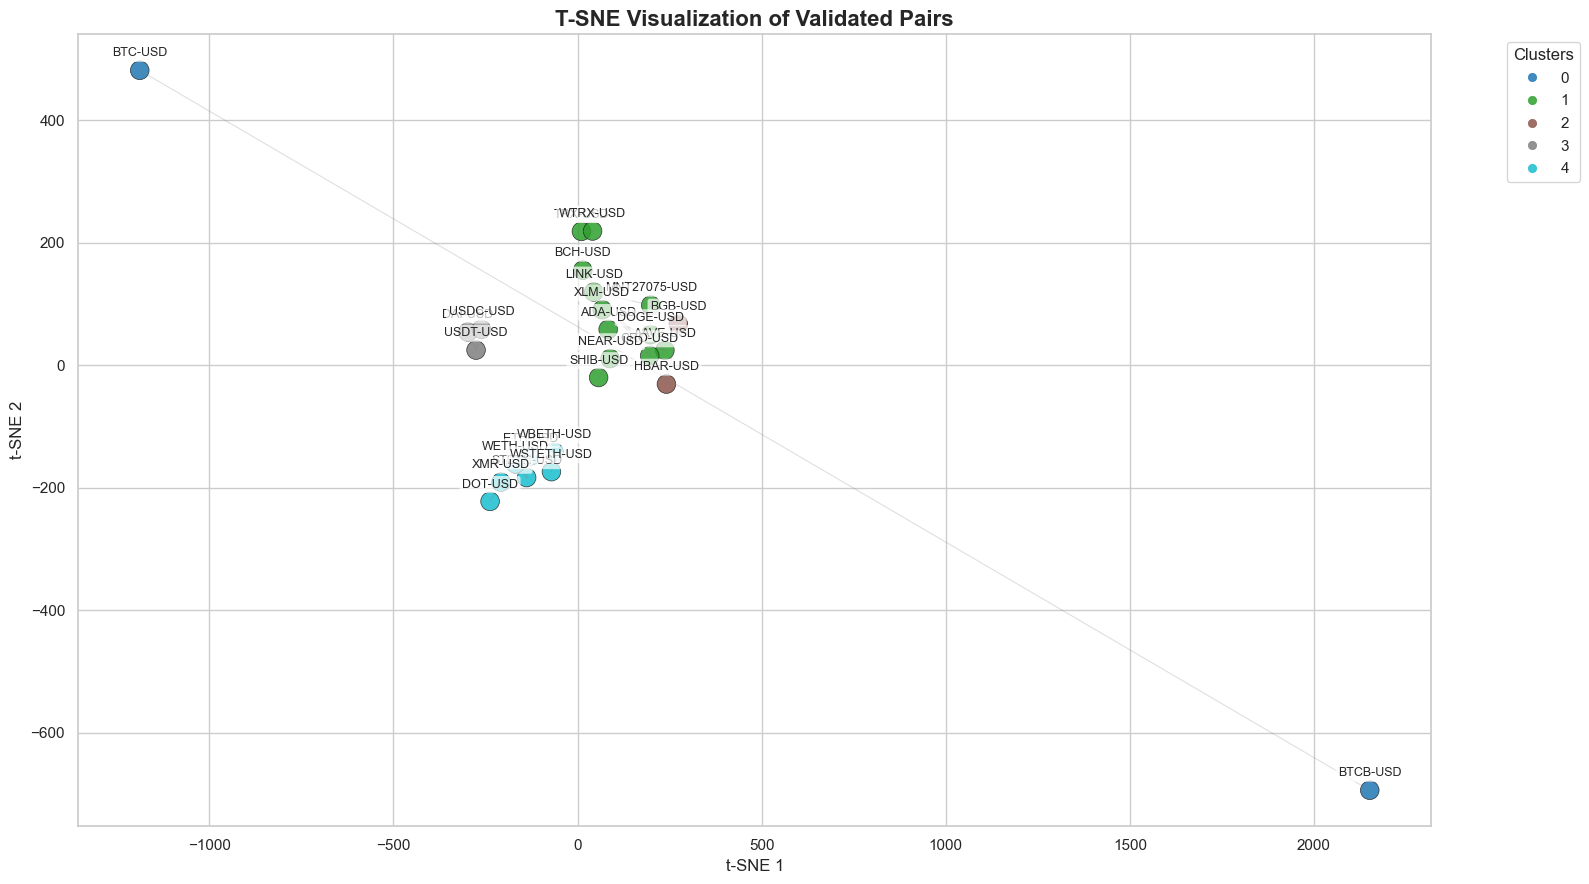

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Estilo mais clean
sns.set(style="whitegrid")

plt.figure(figsize=(16, 9))
plt.clf()

# Desenha as conexões entre pares
for pair in pairs:
    ticker1, ticker2 = pair[0], pair[1]
    loc1 = X_pairs.index.get_loc(ticker1)
    loc2 = X_pairs.index.get_loc(ticker2)
    x1, y1 = X_tsne[loc1, :]
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], color="gray", alpha=0.25, linewidth=0.8)

# Scatter plot dos pontos
scatter = plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    s=180, alpha=0.85,
    c=in_pairs_series.values,
    cmap=cm.get_cmap("tab10", len(set(in_pairs_series.values))),
    edgecolor="k", linewidth=0.5
)



# Adicionar anotações
for x, y, name in zip(X_tsne[:, 0], X_tsne[:, 1], X_pairs.index):
    plt.annotate(
        name, (x, y),
        textcoords="offset points",
        xytext=(0, 10), ha="center",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7, lw=0)
    )

# Título e legendas
plt.title("T-SNE Visualization of Validated Pairs", fontsize=16, fontweight="bold")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()